# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Load house sales data

In [2]:
sales = pd.read_csv('home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Simple Regression Model

In [3]:
from sklearn.model_selection import train_test_split
features = ['sqft_living']
X = sales[features]
y = sales['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Train Model

In [4]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
sqft_model = lin.fit(X_train, y_train)

### Accuracy

In [5]:
sqft_model.score(X_test, y_test)

0.47915770799654933

### Coefficients

In [6]:
print(sqft_model.coef_)
print(sqft_model.intercept_)

[283.96855737]
-48257.06345556211


### Root of mean square error

In [7]:
y_pred = sqft_model.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

248879.06143647007

## Plot

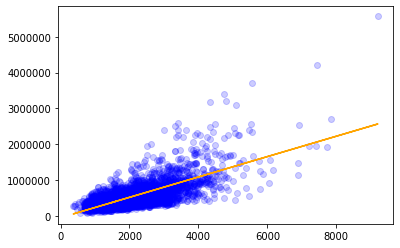

In [8]:
# Scatter Plot
plt.scatter(X_test, y_test, color = 'blue', alpha = 0.2)

# line
plt.plot(X_test, y_pred, color = 'orange')

# Other Features

In [9]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

## Train Model using these features

In [10]:
# X2 = np.array(sales[my_features])
# y2 = np.array(sales['price'])
X2 = sales[my_features]
y2 = sales['price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [11]:
lin2 = LinearRegression()
my_features_model = lin2.fit(X2_train, y2_train)

### Accuracy

In [12]:
my_features_model.score(X2_test, y2_test)

0.4993592813117584

### Coefficients

In [13]:
weight = my_features_model.coef_
pd.DataFrame(list(zip(my_features, weight)), columns = ['Feature', 'Weight']).sort_values(by=['Weight'], ascending=False)

,Feature,Weight
1,bathrooms,11087.093618
5,zipcode,617.971071
2,sqft_living,320.408369
3,sqft_lot,-0.289499
4,floors,-2418.004909
0,bedrooms,-56600.632990


In [14]:
my_features_model.intercept_

-60558259.01813739

### Root of Mean Square Error

In [15]:
y2_pred = my_features_model.predict(X2_test)
RMSE = np.sqrt(mean_squared_error(y2_test, y2_pred))
RMSE

244004.77443104205

# Apply Leanred Models to Make Predictions

In [16]:
house1 = sales[sales['id']==5309101200]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [17]:
house1['price']

1054    620000
Name: price, dtype: int64

In [18]:
sqft_model.predict(house1[features])

array([633267.47422744])

In [19]:
my_features_model.predict(house1[my_features])

array([637556.26515922])